<a href="https://colab.research.google.com/github/rknayak/NNPytorch/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
N_data = 5000
data_x = np.linspace(1.0, 10.0, N_data)[:, np.newaxis]
data_y = data_x + 0.2*np.random.randn(N_data,1) + 0.3*np.sin(data_x) + 1e-1  * np.log( data_x ) **2


In [ ]:
data_x.shape, data_y.shape

((5000, 1), (5000, 1))

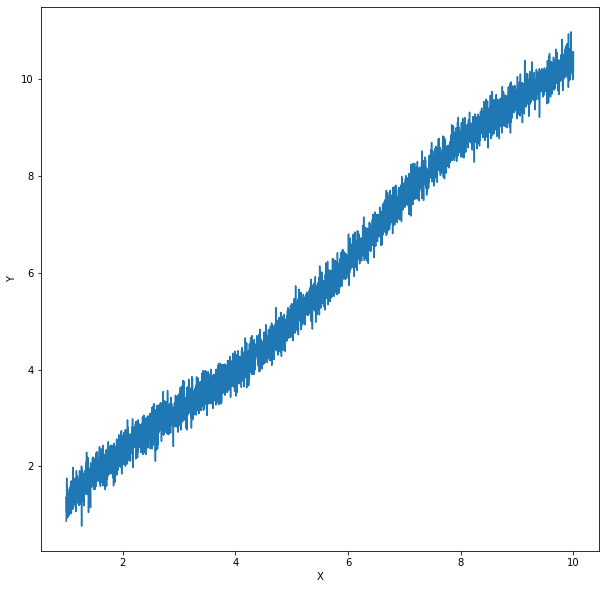

In [ ]:
plt.plot(data_x, data_y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape

((4000, 1), (4000, 1))

In [ ]:
tol = 1e-07


In [ ]:
class LinearRegression(object):
    def __init__(self, X, y, lr = 0.001):
        self.lr = lr
        self.n_samples = len(y)
        self.n_features = X.shape[1]
        self.X = X
        self.y = y
        self.W = np.ones((self.n_features ,1))
        self.b = np.zeros( (1,1) )
    def fit(self, n_iter = 1500):
        for i in range(n_iter):
            y_pred = ( self.X ).dot( self.W)  + self.b
            loss = self.compute_Loss( self.y, y_pred )
            grad_weight =np.dot((y_pred-self.y).T,X_train)/self.n_samples
            grad_bias = np.mean(y_pred- self.y)
            if( abs( np.sum(grad_weight) ) < tol and abs(grad_bias) < tol ) : break
            self.W = self.W - self.lr * grad_weight.T
            self.b = self.b - self.lr * grad_bias
    def predict(self, X) : 

        y_pred = ( X ).dot( self.W)  + self.b
        return y_pred
    def params(self) : 

        weight_dict = {}
        weight_dict['weight'] = self.W
        weight_dict['bias'] = self.b

        return weight_dict            
            
    def compute_Loss(self, y_tar, y_pred):
        return 0.5 * np.mean( pow((y_pred- y_tar),2) )
        
                
     


In [ ]:
learn = LinearRegression(X_train, y_train, lr=1e-3)

In [ ]:
learn.fit(n_iter=2000)

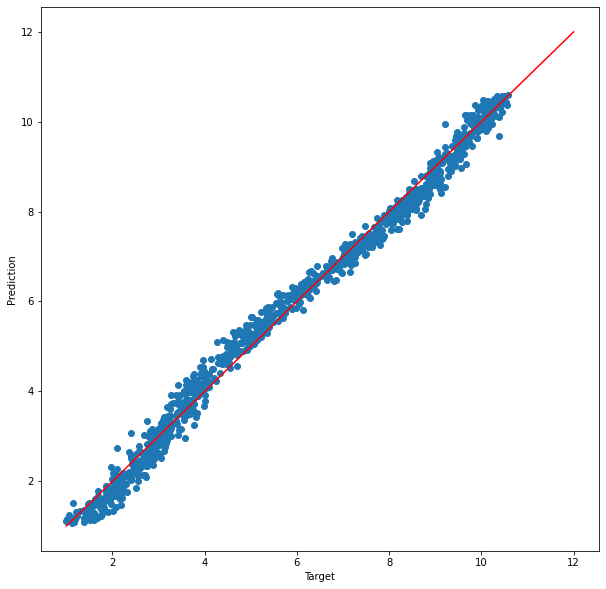

In [ ]:
y_pred = learn.predict( X_test)
plt.scatter( y_test.flatten(), y_pred.flatten()  )
plt.xlabel('Target')
plt.ylabel('Prediction')

plt.plot( np.linspace(1,12, 1000), np.linspace(1,12, 1000), color='r', linewidth=1.5 )